# Principle Component Analysis

In [ ]:
import pandas as pd
import numpy as np

In [2]:
## Read MNIST Train data from csv
## Perofrming steps with 14000 data

mnist_all = pd.read_csv("D:\Machine_Learning\MNIST_Dataset\mnist_train.csv").head(14000)

In [3]:
## Check the shape of Data

mnist_all.shape

(14000, 785)

In [4]:
## Columns of the data

mnist_all.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [5]:
## Seperate feature variables X

mnist_X = mnist_all.iloc[:,1:]
print(mnist_X.shape)
mnist_X.columns

(14000, 784)


Index(['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=784)

In [6]:
## Seperate output Variable Y

mnist_Y = mnist_all.iloc[:,0:1]
print(mnist_Y.shape)
mnist_Y.columns

(14000, 1)


Index(['label'], dtype='object')

In [7]:
## Data Standarization for PCA

from sklearn.preprocessing import StandardScaler

mnist_X_std = StandardScaler().fit_transform(mnist_X)
print(mnist_X_std.shape)

(14000, 784)


In [8]:
## Calculate covariance Matrix

covar_matrix = np.matmul(mnist_X_std.T , mnist_X_std)
covar_matrix.shape

(784, 784)

In [9]:
## Calculate First two eigen values

from scipy.linalg import eigh

eig_val, eig_vec = eigh(covar_matrix, eigvals=(782,783))
eig_vec = eig_vec.T

eig_vec.shape

(2, 784)

In [10]:
## Calculate Reduced feature

mnist_reduced_X = np.matmul(eig_vec, mnist_X_std.T)

mnist_reduced_X = mnist_reduced_X.T
mnist_reduced_X.shape

(14000, 2)

In [13]:
## Append reduced feature X and Label Y in same dataframe for plotting

reduced_feature_X = pd.DataFrame(data=mnist_reduced_X, columns=("1st Principle", "2nd Principle"))
mnist_reduced_XY = pd.concat([reduced_feature_X , mnist_Y],axis=1)

mnist_reduced_XY.head()

,1st Principle,2nd Principle,label
0,-4.286902,-0.816185,5
1,-6.906310,8.780701,0
2,10.313033,2.130169,4
3,-3.426579,-7.240477,1
4,3.496955,-4.940958,9


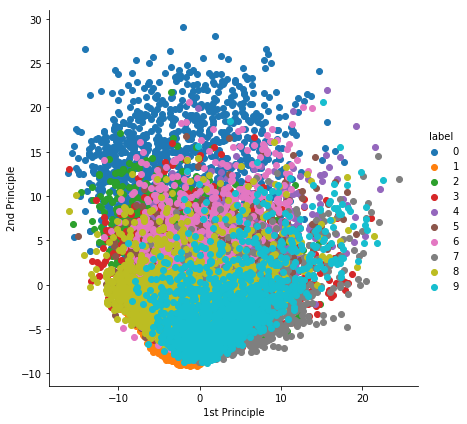

In [14]:
## Plot MNIST data after performing PCA

import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(mnist_reduced_XY, hue='label', height=6).map(plt.scatter, '1st Principle', '2nd Principle').add_legend()
plt.show()